<div style="background-color: #8B0000; padding: 10px; border-radius: 5px;">
  <h1 style="color: white; font-size: 32px;">Projet 5 : Optimisez la gestion des données d'une boutique avec R ou Python</h1>
</div>

In [1]:
# Importation des Librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Options d'affichage.

warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Creation de nos dataframe à partir des importation des nos fichiers excel 

erp = pd.read_excel("Fichier_erp.xlsx")
liaison = pd.read_excel("fichier_liaison.xlsx")
web = pd.read_excel("Fichier_web.xlsx")

<div style="background-color: #8B0000; color: white; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">1-Exploration des données</h1>
</div>

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.1-ERP</h1>
</div>

In [4]:
# affichage de la table

erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
# informations concernant le dataframe

erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


On observe que notre clé primaire 'product_id' est de types int64

In [6]:
# informations concernant le dataframe

erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [7]:
# nombre de doublons

nombre_de_doublons = erp.duplicated().sum()

print("Nombre de doublons dans erp:", nombre_de_doublons)

Nombre de doublons dans erp: 0


In [8]:
# verification de l'unicité

doublons_id = erp['product_id'].duplicated().sum()

print("Nombre de doublons dans product_id:", doublons_id)

Nombre de doublons dans product_id: 0


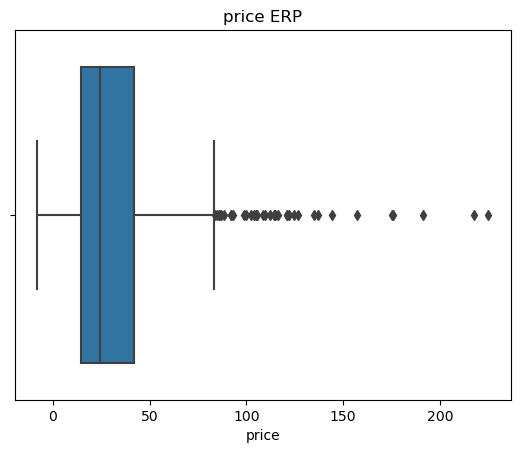

In [10]:
# Création du boxplot avec seaborn
sns.boxplot(x=erp['price'])

# Ajout d'un titre au graphique
plt.title('price ERP')

# Affichage du graphique
plt.show()


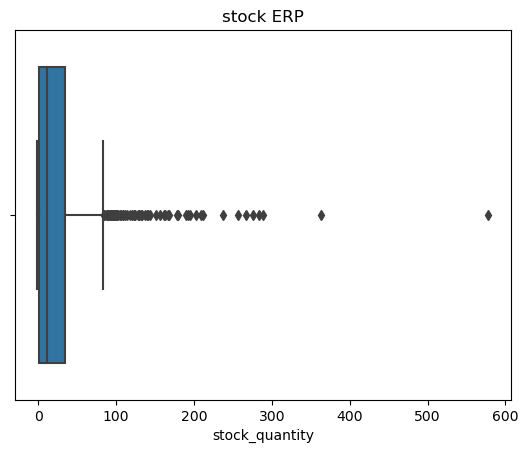

In [11]:
# Création du boxplot avec seaborn
sns.boxplot(x=erp['stock_quantity'])

# Ajout d'un titre au graphique
plt.title('stock ERP')

# Affichage du graphique
plt.show()

In [12]:
#filtrer le stock status sur out of stock dans notre dataframe ERP

df_out = erp. loc[erp['stock_status'] == 'outofstock'] 

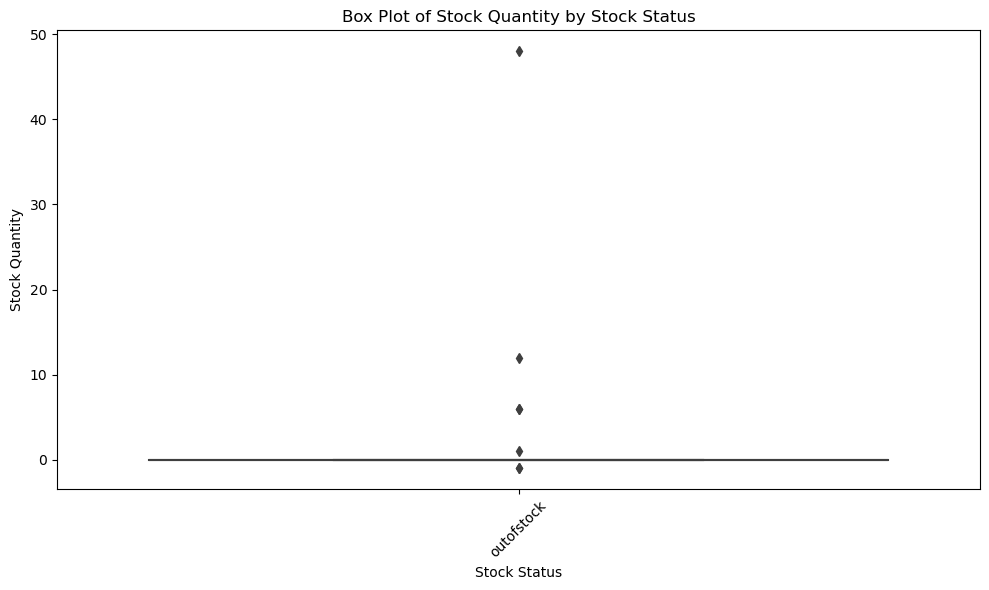

In [13]:
# Création du box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stock_status', y='stock_quantity', data=df_out)
plt.xlabel('Stock Status')
plt.ylabel('Stock Quantity')
plt.title('Box Plot of Stock Quantity by Stock Status')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

In [14]:
# affichage des valeurs aberrantes

df_out_non_zero = df_out.loc[df_out['stock_quantity'] != 0]

# Affichage de df_out_non_zero
print(df_out_non_zero) 

     product_id  onsale_web  price  stock_quantity stock_status
19         4055           0   86.1               1   outofstock
49         4090           0   73.0               6   outofstock
50         4092           0   47.0               6   outofstock
449        4973           0   10.0              -1   outofstock
573        5700           1   44.5              -1   outofstock
630        5826           1   41.2              12   outofstock
696        6125           0   14.2              48   outofstock


In [15]:
# filtrer le stock status sur in stock dans notre dataframe ERP


df_out2 = erp.loc[erp['stock_status'] == 'instock']

In [16]:
# affichage des valeurs aberrantes

df_out_zero = df_out2.loc[df_out2['stock_quantity'] <= 0]

# Affichage de df_out_non_zero
print(df_out_zero) 

     product_id  onsale_web  price  stock_quantity stock_status
443        4954           1   25.0               0      instock


Identification de valeurs aberrantes pour stock_status 

In [17]:
# affichage des valeurs negatives 

prix_mini = erp ['price'].nsmallest(5)

prix_mini

469   -8.0
739   -1.0
700    5.2
100    5.7
101    5.7
Name: price, dtype: float64

Identification de deux valeurs aberrantes pour la colonne price ainsi que des valeurs extremes .

In [18]:
# Affichage de la valeur max des stock 

stock_max = erp.nlargest(10, 'stock_quantity')


stock_max

,product_id,onsale_web,price,stock_quantity,stock_status
130,4208,1,7.6,578,instock
707,6207,1,25.2,363,instock
445,4963,1,7.0,289,instock
388,4861,1,8.5,284,instock
103,4176,1,13.5,276,instock
22,4058,1,8.7,267,instock
386,4858,1,6.5,257,instock
255,4609,1,11.8,237,instock
607,5779,1,5.8,211,instock
115,4191,1,9.3,209,instock


 Observations :

 - Notre DF ERP contient 825 valeurs non nulles pour chaque variable.

 - La clé primaire 'product_id' est de type int64. Nous la transformerons en objet par la suite.

 - On remarque la présence de valeurs aberrantes et extrêmes (outliers) pour les variables price et      stock_quantity/stock status.

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.2-Liaison</h1>
</div>

In [20]:
# affichage de la table

liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [21]:
# informations concernant le dataframe

liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [23]:
# Affichage du nombre de cellules vide

liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [24]:
# nombre de doublons

nombre_de_doublons2 = liaison.duplicated().sum()

print("Nombre de doublons dans liaison:", nombre_de_doublons2)

Nombre de doublons dans liaison: 0


In [25]:
# unicité

doublons_product = liaison['product_id'].duplicated().sum()

print("Nombre de doublons dans product id:", doublons_product)

Nombre de doublons dans product id: 0


In [26]:
# unicité

doublons_product2 = liaison['id_web'].duplicated().sum()

print("Nombre de doublons dans id_web:", doublons_product2)

Nombre de doublons dans id_web: 90


 Observations :

- Notre fichier de liaison, créé par Sylvie, contient le 'product_id' qui correspond au 'product_id' de notre df ERP, ainsi que 'id_web' qui correspond au 'SKU' de notre df WEB. Notre df de liaison nous servira donc à réaliser la jointure entre les DataFrames ERP et WEB.

- Le DataFrame contient 825 valeurs non nulles pour la variable product_id, ce qui est cohérent avec notre fichier ERP qui possède le même nombre de product_id. Pour la variable id_web, on dénombre 734 valeurs non nulles et 90 valeurs nulles, ce qui signifie que des produits sont sans référence web. Nous supprimerons ces valeurs nulles.

- La variable 'product_id' est de type int64. Nous la transformerons en objet par la suite.


<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.3-web</h1>
</div>

In [28]:
# affichage de la table

web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [29]:
# informations concernant le dataframe

web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [30]:
# Affichage du nombre de cellules vide

web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [31]:
# nombre de doublons

nombre_de_doublons3 = web.duplicated().sum()

print("Nombre de doublons dans web:", nombre_de_doublons)

Nombre de doublons dans web: 0


In [32]:
# verification de l'unicité clé primaire

doublons_sku = web['sku'].duplicated().sum()

print("Nombre de doublons dans sku:", doublons_sku)

Nombre de doublons dans sku: 798


Observations :
- Notre fichier Web est issu du CMS

- Le DF web contient 1428 valeurs non nulles pour la variable SKU dont 714 valeurs uniques, contre 734 pour l'id_web du df liaison.

- La variable SKU est la clé primaire de notre DF web ,nous effectuerons un nettoyage de nos valeurs nulls ainsi que nos doublons .


<div style="background-color: #8B0000; color: white; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">2- Nettoyage des données et creation du DF final</h1>
</div>


<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.1-ERP</h1>
</div>


In [33]:
# Correction des valeurs abberrante dans le stock_status

erp.loc[(erp['stock_quantity'] > 0) & (erp['stock_status'] == 'outofstock'), 'stock_status'] = 'instock'


In [34]:
# Verification

erp.head(21)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
5,4040,1,34.3,0,outofstock
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock
8,4043,1,60.0,12,instock
9,4045,1,42.6,66,instock


In [35]:
# Correction des valeurs abberrantes dans le stock_status

erp.loc[(erp['stock_quantity'] <= 0) & (erp['stock_status'] == 'instock'), 'stock_status'] = 'outofstock'

In [36]:
# Verification

print(erp[erp['product_id'] == 4054].iloc[0])

product_id              4054
onsale_web                 1
price                   71.6
stock_quantity             0
stock_status      outofstock
Name: 18, dtype: object


In [37]:
# Changement du type des clés

erp['product_id'] = erp['product_id'].astype('object')

In [38]:
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [39]:
#Verifions nos valeurs abberrantes

erp ['price'].nsmallest(5)

469   -8.0
739   -1.0
700    5.2
100    5.7
101    5.7
Name: price, dtype: float64

In [40]:
# Verification de nos prix negatifs

abberrantes = erp.loc[[469, 739]]

abberrantes

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


Les deux produits ne sont pas en vente sur internet et n'apparaîtront pas du coup dans notre DF final. Nul besoin de les supprimer, il faudrait néanmoins que les services concernés puissent accorder à ces produits leurs véritables prix.

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.2-Liaison</h1>
</div>

In [41]:
# Vérification du nombre de cellules vides

liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [42]:
# Suppression des valeurs vides dans la colonne 'id_web'.

liaison = liaison.loc[~liaison["id_web"].isna()]
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [43]:
# Changement du type des clés 

liaison['product_id'] = liaison['product_id'].astype('object')

In [44]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    object
 1   id_web      734 non-null    object
dtypes: object(2)
memory usage: 17.2+ KB


In [45]:
liaison.dtypes

product_id    object
id_web        object
dtype: object

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.3-web</h1>
</div>

In [46]:
# Changement de nom de notre clé primaire pour le dataframe web pour plus de cohesion avec le df Liaison.

web.rename(columns={'sku': 'id_web'}, inplace=True)

In [47]:
# Verification

web.head(10)

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,15740,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-25 12:32:17,...,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 11:35:02,2020-08-27 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
8,14253,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-20 15:29:32,...,domaine-huet-vouvray-haut-lieu-sec-2016,2020-07-22 09:55:01,2020-07-22 07:55:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [48]:
# Création d'un dataframe avec uniquement les colonnes qui nous intéressent.

web2 = web[['id_web', 'total_sales', 'post_title','post_type']]

In [49]:
# Verification

web2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       1428 non-null   object 
 1   total_sales  1430 non-null   float64
 2   post_title   1430 non-null   object 
 3   post_type    1430 non-null   object 
dtypes: float64(1), object(3)
memory usage: 47.4+ KB


In [50]:
# Affichage des deux lignes dont le "id_web" est vide mais pas le reste des données

web2[web2["id_web"].isna() & ~web2["total_sales"].isna()].head()

,id_web,total_sales,post_title,post_type
353,NaN,3.0,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product
488,NaN,10.0,Pierre Jean Villa Côte Rôtie Fongeant 2017,product


In [51]:
# Création d'une table avec toutes les valeurs non vide

web3 = web2[~web2["id_web"].isna()]
web3

,id_web,total_sales,post_title,post_type
0,16004,5.0,Château du Couvent Pomerol 2017,attachment
2,15075,3.0,Parés Baltà Penedès Indigena 2017,product
3,16209,6.0,Maurel Cabardès Tradition 2017,product
4,15763,1.0,Domaine de la Monardière Vacqueyras Vieilles V...,attachment
5,13895,0.0,Château Saransot-Dupré Bordeaux Blanc 2016,product
...,...,...,...,...
1508,12881,2.0,Domaine de Montbourgeau L'Etoile Vin Jaune 2009,attachment
1509,15663,3.0,Chermette Domaine du Vissoux Brouilly Pierreux...,product
1510,15910,0.0,Thevenet Quintaine Viré-Clessé La Bongran 2015,product
1511,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,attachment


In [52]:
web3.sort_values(by="total_sales", ascending=False).head(10)

,id_web,total_sales,post_title,post_type
742,7818,96.0,Champagne Gosset Grand Blanc de Blancs,product
1429,1662,87.0,Champagne Gosset Grand Rosé,product
1104,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,product
1410,16295,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,attachment
273,16295,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,product
961,16210,43.0,Maurel Pays d'Oc Chardonnay 2019,attachment
201,16210,43.0,Maurel Pays d'Oc Chardonnay 2019,product
170,16189,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...,attachment
529,16189,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...,product
1196,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,product


In [53]:
# Vérification des doublons

web3["id_web"].duplicated().sum()

714

In [54]:
# Utilisez la méthode duplicated() pour trouver nos doublons

doublons = web3[web3['id_web'].duplicated()]

# Affichage des 5 premiers doublons

doublons.head(5)


,id_web,total_sales,post_title,post_type
13,16209,6.0,Maurel Cabardès Tradition 2017,attachment
53,16274,13.0,Mourgues du Grès Costières de Nîmes Capitelles...,attachment
80,12857,0.0,Château de Meursault Puligny-Montrachet 1er Cr...,attachment
85,15325,4.0,Agnès Levet Côte Rôtie Améthyste 2017,attachment
87,15038,10.0,Gilbert Picq Chablis Vieilles Vignes 2017,attachment


In [55]:
# Vérifions s'il existe une différence entre les doublons. Utilisons pour cela 'id_web': 1662,7818,15325"

web3.loc[(web3["id_web"] == 1662) | (web3["id_web"] == 7818) | (web3["id_web"] == 15325)]

,id_web,total_sales,post_title,post_type
35,15325,4.0,Agnès Levet Côte Rôtie Améthyste 2017,product
85,15325,4.0,Agnès Levet Côte Rôtie Améthyste 2017,attachment
742,7818,96.0,Champagne Gosset Grand Blanc de Blancs,product
993,7818,6.0,Champagne Gosset Grand Blanc de Blancs,attachment
1073,1662,7.0,Champagne Gosset Grand Rosé,attachment
1429,1662,87.0,Champagne Gosset Grand Rosé,product


On remarque ici que les doublons ont des valeurs différentes pour 'post_type', notamment 'product' et 'attachment'. Puisqu'ils diffèrent parfois au niveau du prix, nous déciderons de retenir uniquement les doublons ayant pour 'post_type' la valeur 'product'.

In [56]:
# Retrait des doublons dans le fichier 'web'

# Marquer les doublons en fonction de la condition "post_type" égal à "attachment"
doublons = web3[web3["post_type"] == "attachment"]["id_web"]

# Supprimer les doublons marqués
web3 = web3[~(web3["id_web"].isin(doublons)) | (web3["post_type"] == "product")]

In [57]:
# Verification 

web3.sort_values(by="total_sales", ascending=False).head(10)

,id_web,total_sales,post_title,post_type
742,7818,96.0,Champagne Gosset Grand Blanc de Blancs,product
1429,1662,87.0,Champagne Gosset Grand Rosé,product
1104,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,product
273,16295,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,product
201,16210,43.0,Maurel Pays d'Oc Chardonnay 2019,product
529,16189,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...,product
1196,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,product
748,304,40.0,Champagne Gosset Grande Réserve,product
1123,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,product
177,16264,38.0,Château de La Liquière Faugères L'Ampoule 2019,product


In [58]:
# Vérification des doublons

web3["id_web"].duplicated().sum()

0

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.4-creation du df final</h1>
</div>

Nous allons effectuer une jointure interne pour nos deux dataframes, étant donné que nos dataframes possèdent des clés primaires communes. 
Les jointures seront donc plus simples et ne nécessiteront pas d'ajustement final. 
Nous vérifions tout de même l'état de la jointure pour nous assurer qu'elle a été effectuée dans les deux sens

In [59]:
# jointure des tables erp et liaison

inter = pd.merge(erp, liaison, how="inner",on="product_id",indicator="Jointure")


inter.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,Jointure
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [60]:
inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      734 non-null    object  
 1   onsale_web      734 non-null    int64   
 2   price           734 non-null    float64 
 3   stock_quantity  734 non-null    int64   
 4   stock_status    734 non-null    object  
 5   id_web          734 non-null    object  
 6   Jointure        734 non-null    category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 35.4+ KB


In [61]:
# Rappel des compositions de nos differents DF

print(f"Le Dataframe erp est de taille : {erp.shape}\nLe Dataframe liaison est de taille : {liaison.shape}\nLe Dataframe web est de taille : {web3.shape}")


Le Dataframe erp est de taille : (825, 5)
Le Dataframe liaison est de taille : (734, 2)
Le Dataframe web est de taille : (714, 4)


In [62]:
# Verification de la jointure

inter["Jointure"].value_counts()

Jointure
both          734
left_only       0
right_only      0
Name: count, dtype: int64

Jointure reussie avec toutes nos clés 

In [63]:
# jointures des tables inter et web3

final = pd.merge(inter, web3, how="inner",on="id_web", indicator="merge")

final.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,Jointure,total_sales,post_title,post_type,merge
0,3847,1,24.2,0,outofstock,15298,both,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,both
1,3849,1,34.3,0,outofstock,15296,both,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,both
2,3850,1,20.8,0,outofstock,15300,both,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,both
3,4032,1,14.1,0,outofstock,19814,both,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,both
4,4039,1,46.0,0,outofstock,19815,both,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,both
5,4040,1,34.3,0,outofstock,15303,both,0.0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,product,both
6,4041,1,32.7,15,instock,14975,both,0.0,Pierre Gaillard Condrieu 2018,product,both
7,4042,1,31.2,34,instock,16042,both,7.0,Pierre Gaillard Cornas 2017,product,both
8,4043,1,60.0,12,instock,14980,both,3.0,Pierre Gaillard Côte Rôtie Esprit de Blonde 2017,product,both
9,4045,1,42.6,66,instock,16041,both,14.0,Pierre Gaillard Côte Rôtie 2018,product,both


In [64]:
# Verification de la jointure

final["merge"].value_counts()

merge
both          714
left_only       0
right_only      0
Name: count, dtype: int64

Jointure reussie avec toute nos clés

In [65]:
# Suppression des colonnes "merge,jointure" du DataFrame final

final.drop(columns=['merge','Jointure'], inplace=True)

In [66]:
# Verification 

final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product


In [67]:
# Création de la colonne Chiffre d'Affaire

final["CA"] = round(round(final["total_sales"],1) * round(final["price"],1),1)
final

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,0.0
...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product,42.0
710,7023,1,27.5,15,instock,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,product,0.0
711,7025,1,69.0,2,instock,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product,0.0
712,7247,1,54.8,23,instock,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product,0.0


In [68]:
#Vérification des doublons

final.duplicated().sum()

0

In [69]:
#unicité

final['product_id'].duplicated().sum()

0

In [72]:
# Chiffre d'affaire global:

CA_tot = round(final['CA'].sum(),1)

print ("Le chiffre d'affaire total est de", CA_tot)

Le chiffre d'affaire total est de 70568.5


In [73]:
# affichage du TOP20 des bouteilles qui font le plus de chiffre d'affaire .

final.sort_values(by="CA", ascending=False).head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA
194,4334,1,49.0,0,outofstock,7818,96.0,Champagne Gosset Grand Blanc de Blancs,product,4704.0
71,4144,1,49.0,11,instock,1662,87.0,Champagne Gosset Grand Rosé,product,4263.0
218,4402,1,176.0,8,instock,3510,13.0,Cognac Frapin VIP XO,product,2288.0
70,4142,1,53.0,8,instock,11641,30.0,Champagne Gosset Grand Millésime 2006,product,1590.0
69,4141,1,39.0,1,instock,304,40.0,Champagne Gosset Grande Réserve,product,1560.0
201,4355,1,126.5,2,instock,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,product,1391.5
199,4352,1,225.0,0,outofstock,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,product,1125.0
79,4153,1,29.0,0,outofstock,16237,36.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,product,1044.0
651,6206,1,25.2,120,instock,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,product,1033.2
30,4068,1,16.6,157,instock,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,product,1029.2


In [74]:
# Affichage de nos 10 bouteilles avec le plus de stock

final.nlargest(10, 'stock_quantity')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA
126,4208,1,7.6,578,instock,16024,16.0,Domaine Montrose Côtes de Thongue Rosé 2019,product,121.6
652,6207,1,25.2,363,instock,16077,37.0,Domaine Giudicelli Patrimonio Rouge 2016,product,932.4
412,4963,1,7.0,289,instock,15958,2.0,Château Turcaud Bordeaux Rouge 2016,product,14.0
361,4861,1,8.5,284,instock,15307,29.0,Philippe Nusswitz Duché d'Uzès Orénia Rouge 2017,product,246.5
100,4176,1,13.5,276,instock,15629,9.0,Domaine de l'Hortus Pic Saint-Loup La Bergerie...,product,121.5
21,4058,1,8.7,267,instock,16318,11.0,Mourgues du Grès Costières de Nîmes Galets Rou...,product,95.7
359,4858,1,6.5,257,instock,16342,1.0,Château Turcaud Bordeaux Rosé 2019,product,6.5
239,4609,1,11.8,237,instock,15145,0.0,François Bergeret Hautes Côtes de Beaune Rouge...,product,0.0
562,5779,1,5.8,211,instock,16213,8.0,Maurel Pays d'Oc Syrah 2019,product,46.4
112,4191,1,9.3,209,instock,16263,12.0,Château de La Liquière Faugères Les Amandiers ...,product,111.6


On remarquera une incoherence quand à la logique des stocks par rapport à leurs ventes et leur importance dans le chiffre d'affaire.

<div style="background-color: #8B0000; color: white; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">3- Analyse de la variable 'Price'</h1>
</div>

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.1-Analyse univariée</h1>
</div>

In [75]:
final['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Mesure de tendance centrale

In [76]:
print(f"La moyenne est : {round(final['price'].mean(),1)}")
print(f"La médiane est : {round(final['price'].median(),1)}")
print(f"Le mode est : {final['price'].mode().iloc[0]}")

La moyenne est : 32.5
La médiane est : 23.6
Le mode est : 19.0


Mesures de dispersion

In [77]:
print(f"La variance est de : {round(final['price'].var(),1)}")
print(f"L'écart-type est de : {round(final['price'].std(),1)}")

La variance est de : 773.4
L'écart-type est de : 27.8


Mesures de forme

In [78]:
print(f"Le skewness est de : {round(final['price'].skew(),1)}")
print(f"Le kurtosis est de : {round(final['price'].kurtosis(),1)}")

Le skewness est de : 2.6
Le kurtosis est de : 10.1


Le résumé statistique de la colonne 'price' de notre DataFrame est le suivant :

Nous avons un total de 714 valeurs, avec un prix minimum de 5,20€ et un prix maximum de 225€.

La médiane est de 23,6€, la moyenne est de 32,5€, le mode de 19€

L'écart-type est de 27,8 et la variance est de 773,4. Ces valeurs élevées indiquent une dispersion plus grande des valeurs autour de la moyenne.

Le coefficient d'asymétrie (Skewness) est de 2,6, ce qui indique une distribution asymétrique étirée vers la droite.

Le coefficient d'aplatissement (Kurtosis) est de 10,1, ce qui indique une distribution avec des queues plus lourdes (valeurs plus extrêmes).

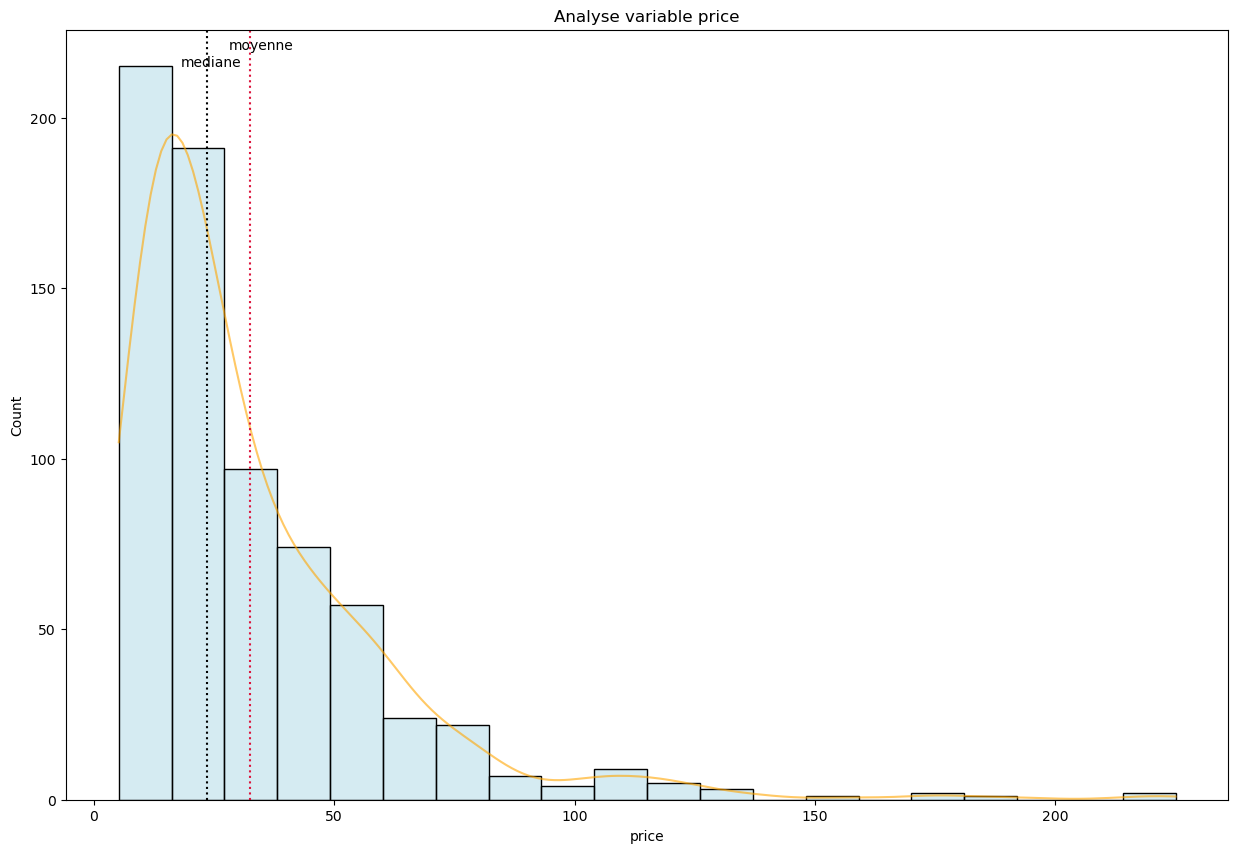

In [79]:
# Graphique pour mieux visualisé nos mesures 

plt.figure(figsize=(15,10))
ax = sns.histplot(final["price"], bins= 20, kde=True ,color="#add8e6")
ax.set(title = "Analyse variable price")
ax.lines[0].set(color="orange", alpha=0.6)
ax.axvline(final["price"].mean(), color="crimson",linestyle="dotted", label="mean")
ax.annotate("moyenne", xy=(2, 1), xytext=(28, 220))
ax.annotate("mediane", xy=(2, 1), xytext=(18, 215))
plt.axvline(final["price"].median(), color="black",linestyle="dotted", label="median")
plt.show()

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.2-méthode des écarts interquartiles</h1>
</div>

La méthode des écarts interquartiles est une technique statistique utilisée pour détecter les valeurs aberrantes dans un ensemble de données.

In [80]:
# Méthode des écarts interquartiles

Q3 = round(np.percentile(final["price"], 75), 1)
Q1 = round(np.percentile(final["price"], 25), 1)
EI = round((Q3 - Q1),1)


Lim_Outliers_Sup = round((Q3 + EI * 1.5),1)

Lim_Outliers_Inf  = round((Q1 - EI * 1.5),1)


print(f"Le prix est considéré comme outlier s'il est en dessous de {Lim_Outliers_Inf}€ ou au-dessus de {Lim_Outliers_Sup}€.")


Le prix est considéré comme outlier s'il est en dessous de -28.1€ ou au-dessus de 84.4€.


In [81]:
# Création du DataFrame des outliers

outliers_df = final[(final["price"] < Lim_Outliers_Inf) | (final["price"] > Lim_Outliers_Sup)]
outliers_df = outliers_df.sort_values(by="price")

outliers_df


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA
205,4359,1,85.6,0,outofstock,13853,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,product,85.6
438,5026,1,86.8,2,instock,13913,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...,product,0.0
65,4132,1,88.4,5,instock,11668,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,product,0.0
502,5565,1,92.0,0,outofstock,19822,0.0,Tempier Bandol Cabassaou 2017,product,0.0
602,5916,1,93.0,3,instock,14774,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,product,0.0
655,6214,1,99.0,7,instock,11601,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,product,0.0
63,4115,1,100.0,11,instock,15382,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,product,0.0
380,4903,1,102.3,20,instock,14805,0.0,Domaine Des Croix Corton Grand Cru Les Grèves ...,product,0.0
222,4407,1,104.0,6,instock,3509,1.0,Cognac Frapin Cigar Blend,product,104.0
432,5008,1,105.0,10,instock,11602,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,product,0.0


In [82]:
outliers_df.describe()

,onsale_web,price,stock_quantity,total_sales,CA
count,32.0,32.000000,32.000000,32.000000,32.000000
mean,1.0,124.571875,7.250000,1.406250,217.812500
std,0.0,36.068727,5.588006,3.109397,505.080853
min,1.0,85.600000,0.000000,0.000000,0.000000
25%,1.0,103.575000,2.750000,0.000000,0.000000
50%,1.0,114.500000,7.000000,0.000000,0.000000
75%,1.0,128.625000,10.250000,1.250000,132.250000
max,1.0,225.000000,20.000000,13.000000,2288.000000


On dénombre 32 outliers avec la méthode des écarts interquartiles. Les outliers sont tous supérieurs, ce qui semble logique étant donné la valeur de la limite inférieure qui est négative et donc aberrante.

<div style="background-color: white; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.3 Méthode Z-score</h1>
</div>

La méthode du z-score est une autre approche couramment utilisée pour détecter les valeurs aberrantes dans un ensemble de données. Elle consiste à mesurer à quel point chaque observation est éloignée de la moyenne de l'ensemble de données en termes d'écart-type.

In [83]:
# Creation de la colonne Z-score

final['z_score'] = (final["price"] - final["price"].mean()) / final["price"].std()

final

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA,z_score
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,145.2,-0.298201
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,0.0,0.064970
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,0.0,-0.420457
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,42.3,-0.661373
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,0.0,0.485674
...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product,42.0,-0.866332
710,7023,1,27.5,15,instock,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,product,0.0,-0.179541
711,7025,1,69.0,2,instock,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product,0.0,1.312700
712,7247,1,54.8,23,instock,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product,0.0,0.802101


Création d'un df avec les Z-scores superieurs à 2 ecarts-type avec notre moyenne

In [84]:
df_outlier2 = final.query("abs(z_score) > 2")
df_outlier2 = df_outlier2.sort_values(by="z_score")
df_outlier2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_type,CA,z_score
65,4132,1,88.4,5,instock,11668,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,product,0.0,2.010277
502,5565,1,92.0,0,outofstock,19822,0.0,Tempier Bandol Cabassaou 2017,product,0.0,2.139725
602,5916,1,93.0,3,instock,14774,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...,product,0.0,2.175682
655,6214,1,99.0,7,instock,11601,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...,product,0.0,2.391428
63,4115,1,100.0,11,instock,15382,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,product,0.0,2.427385
380,4903,1,102.3,20,instock,14805,0.0,Domaine Des Croix Corton Grand Cru Les Grèves ...,product,0.0,2.510088
222,4407,1,104.0,6,instock,3509,1.0,Cognac Frapin Cigar Blend,product,104.0,2.571216
432,5008,1,105.0,10,instock,11602,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,product,0.0,2.607173
431,5007,1,105.0,17,instock,12791,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...,product,0.0,2.607173
647,6201,1,105.6,7,instock,14596,0.0,David Duband Chambolle-Musigny 1er Cru Les Sen...,product,0.0,2.628748


In [85]:
df_outlier2.describe()

,onsale_web,price,stock_quantity,total_sales,CA,z_score
count,30.0,30.0000,30.000000,30.000000,30.000000,30.000000
mean,1.0,127.1300,7.666667,1.466667,229.480000,3.402915
std,0.0,35.8097,5.516954,3.202729,519.923746,1.287631
min,1.0,88.4000,0.000000,0.000000,0.000000,2.010277
25%,1.0,105.0000,3.250000,0.000000,0.000000,2.607173
50%,1.0,115.0000,7.000000,0.000000,0.000000,2.966750
75%,1.0,132.8750,10.750000,1.750000,188.750000,3.609492
max,1.0,225.0000,20.000000,13.000000,2288.000000,6.922087


On dénombre donc 32 outliers avec la méthode des écarts interquartiles contre 30 outliers pour la methode Z-score .

En conclusion, nos outliers ne sont pas des valeurs aberrantes. Effectivement, la disparité des prix sur le marché du vin n'est pas nouvelle ; nos outliers sont pour la plupart des vins haut de gamme. 

Les prix concordent avec le marché et les prix appliqués par la concurrence. 

Cependant, il serait avisé de compléter notre base de données concernant les bouteilles qui n'ont pas d'ID web,de corriger les valeurs abberantes pour les prix negatifs, ainsi que de revoir le système de stock, puisqu'il apparaît parfois comme incohérent face aux au CA des produits ,et on optimisera ainsi nos ventes. 

À titre d'exemple ,le best-seller est par exemple out of stock, alors qu'il représente à lui seul 6,6 % du chiffre d'affaires total contrairement à la bouteille "Domaine Montrose Côtes de Thongue Rosé 2019" avec 579 bouteilles en stock qui n'a été vendu que 16 fois representant ainsi seulement 0,17 % du chiffre d'affaire.